In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

In [ ]:
img_path = '/home/wz/Downloads/saed_hm.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('original img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

img_len, img_width = img.shape[0], img.shape[1]
print(img_len, img_width)

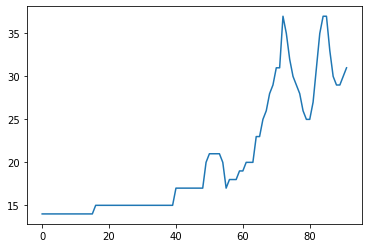

In [23]:
i = img_width//2
inten_list = []
for j in range(img_len//3+20):
    inten_list.append(img[j, j])

plt.plot(inten_list)

In [38]:
#*VBGMM
# path = '/run/user/1000/gvfs/smb-share:server=nas-inuilab.local,share=data_users/WangZhi/Image data/EBSDdata/20220805/dense_1_hcp.bmp'
img_n = '4050_'
path = f'//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/20220810/{img_n}.bmp'
path_out = f'//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/20220810/{img_n}_p.bmp'
path_phaseout = f'//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/20220810/{img_n}_hcpfrac.bmp'

img = cv2.imread(path)
img_ = img.reshape(-1, 3)

cv2.imshow('original img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

img_len, img_width = img.shape[0], img.shape[1]
print(img_len, img_width)

1024 350


In [48]:
#*inserting position into raw image array
img_pos = np.zeros((img_len, img_width, 5))
for i in range(img_len):
    for j in range(img_width):
        img_pos[i, j] = np.insert(np.array([i, j]), 0, img[i, j])

img_pos_ = img_pos.reshape(-1, 5)   

In [49]:
vbgmm = mixture.BayesianGaussianMixture(n_components=10, random_state=0)
vbgmm=vbgmm.fit(img_pos_)
labels=vbgmm.predict(img_pos_)

In [50]:
for l in np.unique(labels):
    len_i = len([img_[i] for i in range(len(labels)) if labels[i] == l])
    print(f'label={l}, length={len_i}')

label=0, length=26732
label=3, length=65133
label=4, length=13893
label=6, length=16175
label=7, length=201270
label=9, length=35197


In [53]:
true_list = [7, 3, 9, 0]
img = cv2.imread(path)
img_ = img.reshape(-1, 3)
img_phase = img_.copy()
for i in range(len(img_)):

    if labels[i] not in true_list and np.min(img_[i]) < 250:
        img_[i] = np.zeros(3)
        img_phase[i] = np.zeros(3)
    #fcc
    elif labels[i] == true_list[0] and np.min(img_[i]) < 250:
        img_phase[i][0], img_phase[i][1], img_phase[i][2] = 0, 0, 255
    #hcp
    elif labels[i] != true_list[0] and np.min(img_[i]) < 250:
        img_phase[i][0], img_phase[i][1], img_phase[i][2] = 0, 255, 0

img_p = img_.reshape(img.shape)
img_phase_p = img_phase.reshape(img.shape)

cv2.imshow('img', np.hstack([img_p, img_phase_p]))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
cv2.imwrite(path_out, img_p)
cv2.imwrite(path_phaseout, img_phase_p)

True

In [55]:
#*Inverse img
path = '//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/nonEter_sup/4520_4_HCPFRAC114.bmp'
img = cv2.imread(path)

cv2.imshow('original img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

img.shape

(1024, 347, 3)

In [52]:
length = []
for i in range(1024):
    for j in range(347):
        pix = img[i][j]
        if pix[2] == 255 and pix[0] == 0:
            pix[2] = 0
            pix[1] = 255

        elif pix[1] == 255 and pix[0] == 0:
            pix[2] = 255
            pix[1] = 0
    
cv2.imshow('original img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
path_n = '//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/nonEter_sup/4520_4_HCPFRAC114.bmp'
cv2.imwrite(path_n, img)

True

In [208]:
#extrat certain color
index = 8
path = "//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/20220710/"
name_fcc = f'4525_FCC_{index}.bmp'
name_hcp = f'4525_HCP_{index}_CI.bmp'
name_raw = f'4525_HCP_{index}.bmp'
name_new = f'4525_HCP_{index}_new.bmp'
img_fcc = cv2.imread(path + name_fcc)
img = cv2.imread(path + name_hcp)
img_raw = cv2.imread(path + name_raw)
img_raw1 = img_raw.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pix = img[i][j]
        if np.linalg.norm(pix) < 10:
            img_raw[i][j] = np.zeros(3)

cv2.imshow('extration img', np.hstack([img_raw1, img_raw]))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [209]:
#extrat certain color
# index = 8
# path = "//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/20220710/"
# name_fcc = f'4525_FCC_{index}.bmp'
# name_hcp = f'4525_HCP_{index}.bmp'
# name_new = f'4525_HCP_{index}_new.bmp'

# img_fcc = cv2.imread(path + name_fcc)
# img_raw = cv2.imread(path + name_hcp)

low_pink = np.array([150, 100, 100])
high_pink = np.array([255, 255, 255])

x1 = cv2.inRange(img_raw, low_pink, high_pink)
z1 = cv2.bitwise_and(img_raw, img_raw, mask = x1)

# low_purple = np.array([0, 200, 100])
# high_purple = np.array([100, 255, 150])

# x2 = cv2.inRange(img, low_purple, high_purple)
# z2 = cv2.bitwise_and(img, img, mask = x2)

# low_purple = np.array([100, 80, 200])
# high_purple = np.array([255, 150, 255])

# x3 = cv2.inRange(img, low_purple, high_purple)
# z3 = cv2.bitwise_and(img, img, mask = x3)

z = z1

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        pix = z[i][j]
        # if np.mean(pix) > 190:
        #     pix[0], pix[1], pix[2] = 0, 0, 0

cv2.imshow('extration img', np.hstack([img_raw, z]))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [210]:
cv2.imwrite(path+name_new, z)

True

In [192]:
count_hcp, count_fcc = 0, 0
height, width = z.shape[0], z.shape[1]
for i in range(height):
    for j in range(width):
        if 440 > np.linalg.norm(z[i][j]) > 0:
            count_hcp += 1
        if 440 > np.linalg.norm(img_fcc[i][j]) > 0:
            count_fcc += 1


hcp_f = count_hcp/(count_hcp + count_fcc)
print(f'HCP farc: {hcp_f}')

HCP farc: 0.040266157835510547


In [106]:
#denoising
path = '//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/nonEter_sup/'
name = '4515_hcp.bmp'
name_new = '4515_hcp_new.bmp'
img = cv2.imread(path + name)
print(img.shape)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pix = img[i][j]
        if np.linalg.norm(pix) > 2 and np.random.rand() > 0.04 and np.linalg.norm(pix) < 441:
            pix[0], pix[1], pix[2] = 0, 0, 0

cv2.imshow('extration img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(1023, 349, 3)


In [107]:
count_hcp = 0
height, width = img.shape[0], img.shape[1]
for i in range(height):
    for j in range(width):

        if np.linalg.norm(img[i][j]) > 0:
            count_hcp += 1


hcp_f = count_hcp/(height*width)
print(f'HCP farc: {hcp_f}')

HCP farc: 0.009324224778518152


In [233]:
#*merge FCC and HCP phase into phasemap
index = 4
path = "//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/20220617/"
name_fcc = f'4020_fcc_{index}.bmp'
name_hcp = f'4020_hcp_{index}.bmp'
name_new = f'4020_hcpfrac_{index}.bmp'

fcc_img = cv2.imread(path + name_fcc)
hcp_img = cv2.imread(path + name_hcp)
hcp_raw1, hcp_raw2 = hcp_img.copy(), hcp_img.copy()

height, width = fcc_img.shape[0], fcc_img.shape[1]
count_hcp, count_fcc = 0, 0

for i in range(height):
    for j in range(width):
        pix_fcc = fcc_img[i][j]
        pix_hcp = hcp_img[i][j]
        if 440 > np.linalg.norm(pix_fcc) > 1:
            count_fcc += 1
            pix_fcc[0], pix_fcc[1], pix_fcc[2] = 0, 0, 255
        if 440 > np.linalg.norm(pix_hcp) > 1:
            count_hcp += 1
            pix_hcp[0], pix_hcp[1], pix_hcp[2] = 0, 255, 0

img = fcc_img + hcp_img
true_frac = count_hcp/(count_fcc+count_hcp)
print(f'True fraction of HCP: {true_frac}')

cv2.imshow('merge img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

True fraction of HCP: 0.010879331559218245


In [234]:
cv2.imwrite(path+name_new, img)

True

In [ ]:

path = "//NAS-INUILAB/Data_Users/WangZhi/nonE_CrCoNi/nonEter_sup/"
name_fcc = '4030_fcc.bmp'
name_hcp = '4030_hcp_new.bmp'
name_new = '4520_frac_4_new.bmp'

In [231]:
#*remove random noise
index = 4
path = "//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/20220617/"
name_fcc = f'4020_fcc_{index}.bmp'
name_hcp = f'4020_hcp_{index}.bmp'
name_new = f'4020_hcpfrac_{index}.bmp'

fcc_img = cv2.imread(path + name_fcc)
hcp_img = cv2.imread(path + name_hcp)
hcp_raw1, hcp_raw2 = hcp_img.copy(), hcp_img.copy()
height, width = fcc_img.shape[0], fcc_img.shape[1]

w_h, w_w = 40, 40
tolerate_degree = 4
for i in range(height):
    for j in range(width):
        if i + w_h <= height and j + w_w <= width:
            filter_ = hcp_raw1[i:i+w_h, j:j+w_w]
            # print(filter_.shape)
            f_2, f_1, f_0 = filter_[:,0], filter_[:,1], filter_[:,2]
            f_2 = f_2[f_2 > 5]
            f_1 = f_1[f_1 > 5]
            f_0 = f_0[f_0 > 5]
            var_2, var_1, var_0 = np.sqrt(np.var(f_2)), np.sqrt(np.var(f_1)), np.sqrt(np.var(f_0))
            if ((len(np.unique(f_2)) > tolerate_degree 
            or len(np.unique(f_1)) > tolerate_degree 
            or len(np.unique(f_0)) > tolerate_degree) 
            and np.mean([var_1, var_2, var_0]) > 40):
                hcp_raw1[i:i+w_h, j:j+w_w] = np.zeros((w_h, w_w, 3))

cv2.imshow('denoised img', np.hstack([hcp_raw1, hcp_raw2]))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [232]:
cv2.imwrite(path+name_hcp, hcp_raw1)

True

In [195]:
cv2.imwrite(path+name_new, img)

True

In [ ]:
#*True fraction of HCP
path = '//NAS-INUILAB/Data_Users/WangZhi/Image data/EBSDdata/nonEter_sup/'
name_fcc = '4020_fcc.bmp'
name_hcp = '4020_hcp_new.bmp'